In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from nltk.corpus import PlaintextCorpusReader

In [2]:
# data를 corpus화
corpus_root = 'C://Users/cse_223/Python_data_3000'
QACorpus = nltk.corpus.PlaintextCorpusReader(corpus_root, ".*\.txt", encoding="utf_8")

In [3]:
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

['file_1.txt',
 'file_10.txt',
 'file_100.txt',
 'file_1000.txt',
 'file_1001.txt',
 'file_1002.txt',
 'file_1003.txt',
 'file_1004.txt',
 'file_1005.txt',
 'file_1006.txt',
 'file_1007.txt',
 'file_1008.txt',
 'file_1009.txt',
 'file_101.txt',
 'file_1010.txt',
 'file_1011.txt',
 'file_1012.txt',
 'file_1013.txt',
 'file_1014.txt',
 'file_1015.txt',
 'file_1016.txt',
 'file_1017.txt',
 'file_1018.txt',
 'file_1019.txt',
 'file_102.txt',
 'file_1020.txt',
 'file_1021.txt',
 'file_1022.txt',
 'file_1023.txt',
 'file_1024.txt',
 'file_1025.txt',
 'file_1026.txt',
 'file_1027.txt',
 'file_1028.txt',
 'file_1029.txt',
 'file_103.txt',
 'file_1030.txt',
 'file_1031.txt',
 'file_1032.txt',
 'file_1033.txt',
 'file_1034.txt',
 'file_1035.txt',
 'file_1036.txt',
 'file_1037.txt',
 'file_1038.txt',
 'file_1039.txt',
 'file_104.txt',
 'file_1040.txt',
 'file_1041.txt',
 'file_1042.txt',
 'file_1043.txt',
 'file_1044.txt',
 'file_1045.txt',
 'file_1046.txt',
 'file_1047.txt',
 'file_1048.txt',
 '

In [4]:
titles = [title[:-4] for title in QACorpus.fileids()]
titles[:10]

['file_1',
 'file_10',
 'file_100',
 'file_1000',
 'file_1001',
 'file_1002',
 'file_1003',
 'file_1004',
 'file_1005',
 'file_1006']

In [5]:
synopses = [QACorpus.raw(title + ".txt") for title in titles]
synopses[:2]

['My registration code returns incorrect even if the details are correctI am using python to create a registration that asks if the user has already signed up. If they have, they can enter their usename and password. If not, they can register and create a username and password, which are then stored in a text file.\r\nThe details they enter if they are registered are chekcked against details stored in an external text file. However, the program always returns "Incorrect" even if the details are correct.\r\nHere is my code:\r\n    def user_authentication(): #checks if the user\'s login details are correct or not\r\n    username = input ("Please enter your username: ") #allows the user to enter their details \r\n    password = input ("Please enter your password: ")\r\n    with open ("UserDetails.txt") as file: #this file contains the usernames and passwords of authorised users \r\n        for line in file: #the program will check every line in the file \r\n            actual_user,actual_

In [6]:
# stopwords 단어 제거 하기 위해 nltk download 실행
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
# stopwords by english 이용하기
stopwords = nltk.corpus.stopwords.words('english')

In [8]:
# lemmatize(표제어(Lemma)는 한글로는 '표제어' 또는 '기본 사전형 단어' 정도의 의미) 이용하기
# lemmatize : 단어의 형태학적 파싱을 먼저 진행하기 위해
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
# 정규표현식과 Lemmatize를 사용해 필요한 단어만 추출
def tokenize_and_lemmatize(text):
    tokens  = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('^[a-zA-z]+$',token):
            filtered_tokens.append(token)
        if re.search('^[a-zA-z]+[0-9]+$',token):
            filtered_tokens.append(token)
        if re.search('^[0-9]+[a-zA-z]+$',token):
            filtered_tokens.append(token)
    lemmas = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lemmas

# 정규표현식을 사용해 필요한 단어만 추출, Lemmatize를 적용하기 전의 단어
def tokenize_only(text):
    tokens  = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('^[a-zA-z]+$',token):
            filtered_tokens.append(token)
        if re.search('^[a-zA-z]+[0-9]+$',token):
            filtered_tokens.append(token)
        if re.search('^[0-9]+[a-zA-z]+$',token):
            filtered_tokens.append(token)
    return filtered_tokens

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cse_223\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# synopses에 함수 적용해 단어 추출하기
totalvocab_lemmatized = []
totalvocab_tokenized = []
for i in synopses:
    allwords_lemmatized = tokenize_and_lemmatize(i)
    totalvocab_lemmatized.extend(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [12]:
# 결과 - 추출된 단어
print(totalvocab_lemmatized[:20])
print(totalvocab_tokenized[:20])

['my', 'registration', 'code', 'return', 'incorrect', 'even', 'if', 'the', 'detail', 'are', 'correcti', 'am', 'using', 'python', 'to', 'create', 'a', 'registration', 'that', 'asks']
['My', 'registration', 'code', 'returns', 'incorrect', 'even', 'if', 'the', 'details', 'are', 'correctI', 'am', 'using', 'python', 'to', 'create', 'a', 'registration', 'that', 'asks']


In [13]:
# 단어의 원형을 찾을 수 있게 하는 데이터
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_lemmatized)
print("there are" + str(vocab_frame.shape[0]) + "items in vocab_frame")

there are40618018items in vocab_frame


In [14]:
print(vocab_frame.head())

                     words
my                      My
registration  registration
code                  code
return             returns
incorrect        incorrect


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 객체 선언
# max_df: 문서 내의 80% 이상이 그 단어로 이루어지면 고려 X
# min_idf: 적어도 20%의 문서 내에서 해당 단어를 포함하고 있어야 함
# max_features: feature의 최대 수 지정해주기
# ngram_range: 단어 collocation 몇개까지 할지
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_lemmatize, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

# TF-IDF 벡터화의 최종 결과물
print(tfidf_matrix.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Wall time: 12min 35s
(3000, 3161)


In [16]:
# 특징(단어사전) - 알파벳 순 정렬
terms = tfidf_vectorizer.get_feature_names() 
terms[:100]

['1d',
 '1st',
 '2d',
 '2d array',
 '2nd',
 '3d',
 '3rd',
 '[ [ [',
 '[ [ ``',
 '[ ] \\',
 '[ ] _',
 '[ ] add',
 '[ ] array',
 '[ ] b',
 '[ ] c',
 '[ ] class',
 '[ ] code',
 '[ ] column',
 '[ ] create',
 '[ ] d',
 '[ ] data',
 '[ ] df1',
 '[ ] df2',
 '[ ] doe',
 '[ ] elif',
 '[ ] error',
 '[ ] f',
 '[ ] false',
 '[ ] file',
 '[ ] import',
 '[ ] index',
 '[ ] int',
 '[ ] item',
 '[ ] j',
 '[ ] k',
 '[ ] key',
 '[ ] l',
 '[ ] lambda',
 '[ ] len',
 '[ ] like',
 '[ ] line',
 '[ ] list',
 '[ ] m',
 '[ ] n',
 '[ ] need',
 '[ ] note',
 '[ ] open',
 '[ ] output',
 '[ ] p',
 '[ ] python',
 '[ ] r',
 '[ ] range',
 '[ ] result',
 '[ ] row',
 '[ ] s',
 '[ ] set',
 '[ ] str',
 '[ ] t',
 '[ ] true',
 '[ ] try',
 '[ ] use',
 '[ ] using',
 '[ ] value',
 '[ ] want',
 '[ ] y',
 '[ `` ]',
 '[ `` ``',
 '[ `` id',
 '[ b ]',
 '[ b c',
 '[ c',
 '[ c ]',
 '[ closed',
 '[ closed ]',
 '[ col',
 '[ col ]',
 '[ d',
 '[ df',
 '[ df [',
 '[ e',
 '[ errno',
 '[ errno ]',
 '[ f',
 '[ idx',
 '[ idx ]',
 '[ index',
 '[

In [17]:
# document간의 distance를 젤 때 사용 -> 각도가 크면 클 수록 서로 동떨어진 자료
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

K-means clustering

In [18]:
from sklearn.cluster import KMeans

# 군집화 할 그룹의 갯수 정의
num_clusters = 21

# k-means 알고리즘 적용
km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 22.9 s


In [19]:
# pandas로 데이터 객체 생성하기
import pandas as pd

thesis = { 'Title': titles, 'Synopsis': synopses, 'Cluster': clusters}

frame = pd.DataFrame(thesis, index=[clusters], columns = ['Title', 'Synopsis', 'Cluster'])

In [20]:
frame.head(20)

,Title,Synopsis,Cluster
14,file_1,My registration code returns incorrect even if...,14
2,file_10,Get column and row from Trinomial triangleWhat...,2
19,file_100,IndexError: list index out of range while assi...,19
7,file_1000,django python has_change_permission for handli...,7
2,file_1001,How to format a 2d array to fit a Soduku board...,2
16,file_1002,DataFrame filtering [duplicate]This question a...,16
17,file_1003,tkinter optionmenu keyerror on first 2 options...,17
2,file_1004,Disable echoing the selected code in Spyder Ip...,2
19,file_1005,Find intersection of words from two list of st...,19
12,file_1006,How to Access google sheets offline with pytho...,12


In [21]:
# 각 cluster별로 분류된 파일 개수
frame['Cluster'].value_counts()

19    588
5     358
14    251
7     247
2     224
3     223
6     206
15    140
0     127
17    107
16     97
4      64
13     61
8      55
12     53
10     53
18     52
11     30
1      28
20     22
9      14
Name: Cluster, dtype: int64

In [22]:
# cluster별로 중요한 term들
from __future__ import print_function  

print("Top terms per cluster:")
print()  

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='') #replace 6 with n words per cluter
    for ind in order_centroids[i,:5]:
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0], end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    
    
    for title in frame.loc[i]['Title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: div, span, NaN, div, img,

Cluster 0 titles: file_1013, file_1020, file_1078, file_110, file_1101, file_1102, file_1118, file_1119, file_1169, file_1176, file_118, file_1185, file_1194, file_1195, file_1284, file_13, file_1302, file_1362, file_138, file_1386, file_1400, file_1404, file_1416, file_1431, file_1436, file_1437, file_1457, file_1487, file_15, file_1528, file_1534, file_1547, file_1552, file_156, file_1569, file_1591, file_1595, file_1610, file_162, file_163, file_1634, file_1646, file_166, file_1707, file_1710, file_1743, file_1778, file_1787, file_1790, file_1827, file_1831, file_1839, file_1927, file_1933, file_1957, file_2050, file_2053, file_2076, file_209, file_2099, file_2110, file_2141, file_2154, file_2165, file_2203, file_2233, file_2248, file_2266, file_2270, file_2302, file_2319, file_2338, file_234, file_2364, file_2459, file_2479, file_2488, file_2495, file_2502, file_2508, file_2543, file_256, file_2565, file_2579, file

Multidimensional scaling

In [23]:
# 고차원 공간을 2차원으로 압축
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()#다차원 스케일링을 사용하여 dist 행렬을 2차원 배열로 변환

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [24]:
print(xs[:10])
print(ys[:10])

[-0.4494333   0.01639088 -0.18186588  0.38808998 -0.03316767  0.10805171
  0.2910594   0.02159871 -0.14058589  0.560026  ]
[-0.33427191 -0.37611771  0.20660394  0.52861701 -0.4028733   0.42541591
 -0.04466852  0.29748391  0.50192215  0.27057454]


Visualizing document clusters

In [25]:
# 딕셔너리를 사용해 색상 설정하기
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#b2182b', 6:'#3f007d',7:'#8dd3c7', 8:'#f1a340',9:'#35978f',
                 10: '#f5f545',  11: '#18d3e9', 12: '#1a19c8', 13: '#68f545', 14:'#010b12', 15:'#065b96', 16:'#28d4ac',17:'#32727d', 18:'#3f1554', 
                 19:'#61075c', 20:'#ba4c07'}
# 딕셔너리를 사용해 클러스터 이름 지정하기(단어로 지정 가능)
cluster_names = {0: 'Cluster 0', 
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4',
                 5: 'Cluster 5', 
                 6: 'Cluster 6', 
                 7: 'Cluster 7', 
                 8: 'Cluster 8',
                 9: 'Cluster 9',
                 10: 'Cluster 10',
                 11: 'Cluster 11',
                 12: 'Cluster 12',
                 13: 'Cluster 13',
                 14: 'Cluster 14',
                 15: 'Cluster 15',
                 16: 'Cluster 16',
                 17: 'Cluster 17',
                 18: 'Cluster 18',
                 19: 'Cluster 19',
                 20: 'Cluster 20'
                }

In [26]:
# DataFrame 생성하기
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 
df.head(10)

,x,y,label,title
0,-0.449433,-0.334272,14,file_1
1,0.016391,-0.376118,2,file_10
2,-0.181866,0.206604,19,file_100
3,0.388090,0.528617,7,file_1000
4,-0.033168,-0.402873,2,file_1001
5,0.108052,0.425416,16,file_1002
6,0.291059,-0.044669,17,file_1003
7,0.021599,0.297484,2,file_1004
8,-0.140586,0.501922,19,file_1005
9,0.560026,0.270575,12,file_1006


In [27]:
# cluster로 group화 하기
groups = df.groupby('label')
groups.size()

label
0     127
1      28
2     224
3     223
4      64
5     358
6     206
7     247
8      55
9      14
10     53
11     30
12     53
13     61
14    251
15    140
16     97
17    107
18     52
19    588
20     22
dtype: int64

In [28]:
for name, group in groups:
    print("Cluster", name)
    print(group)
    print()

Cluster 0
             x         y  label      title
17    0.090973 -0.590959      0  file_1013
25    0.057735 -0.431654      0  file_1020
88    0.147303 -0.276436      0  file_1078
113  -0.171334 -0.027809      0   file_110
115  -0.225193 -0.493281      0  file_1101
...        ...       ...    ...        ...
2859 -0.509933 -0.172640      0   file_872
2863  0.469080  0.115210      0   file_876
2892  0.433079  0.043163      0   file_901
2945  0.231749 -0.569300      0    file_95
2971 -0.659553  0.097146      0   file_973

[127 rows x 4 columns]

Cluster 1
             x         y  label      title
63   -0.433068  0.212993      1  file_1055
146  -0.574878  0.289187      1   file_113
205   0.644627 -0.212075      1  file_1183
214  -0.134043 -0.644662      1  file_1191
372  -0.475260 -0.047451      1  file_1333
455  -0.204734  0.386019      1  file_1408
590  -0.437720  0.439832      1   file_153
611   0.541942  0.356111      1  file_1549
711  -0.217029  0.633567      1  file_1639
935  -0.3

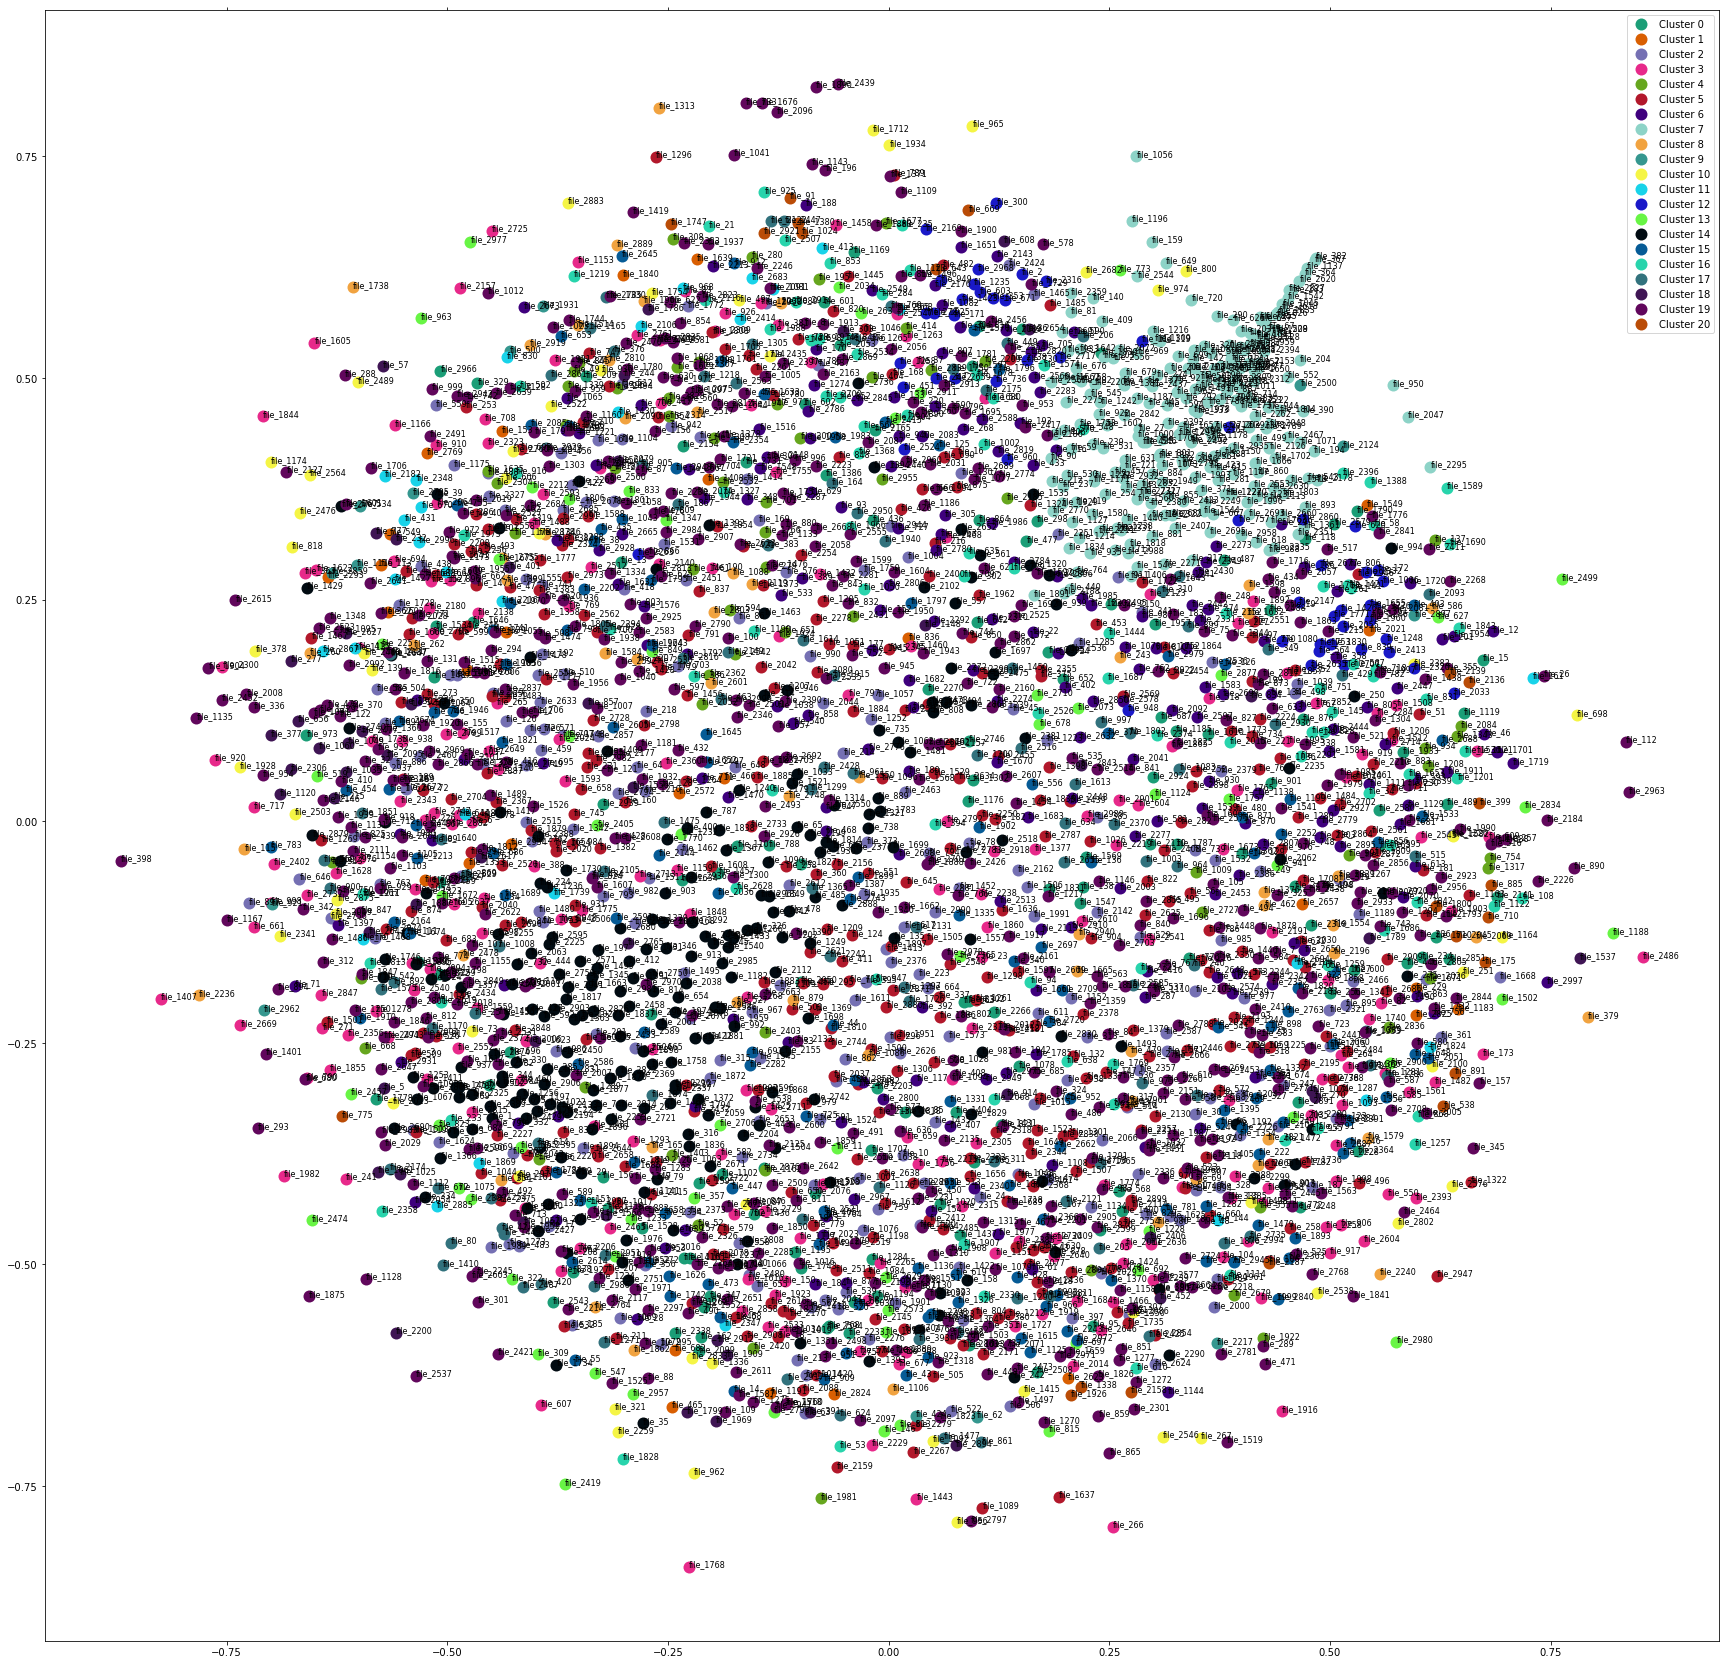

In [29]:
fig, ax = plt.subplots(figsize=(30, 30)) # size 지정하기
ax.margins(0.05) # 5% padding 추가하기

# iterate through groups to layer the plot
# name에는 cluster number가 group에는 데이터들이 저장
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

# legend 설정하기
ax.legend(numpoints=1)  #show legend with only 1 point

# (x, y)위치에 논문 title 텍스트 추가하기 
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

#show the plot
plt.show()

In [30]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [31]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

Hierarchical document clustering

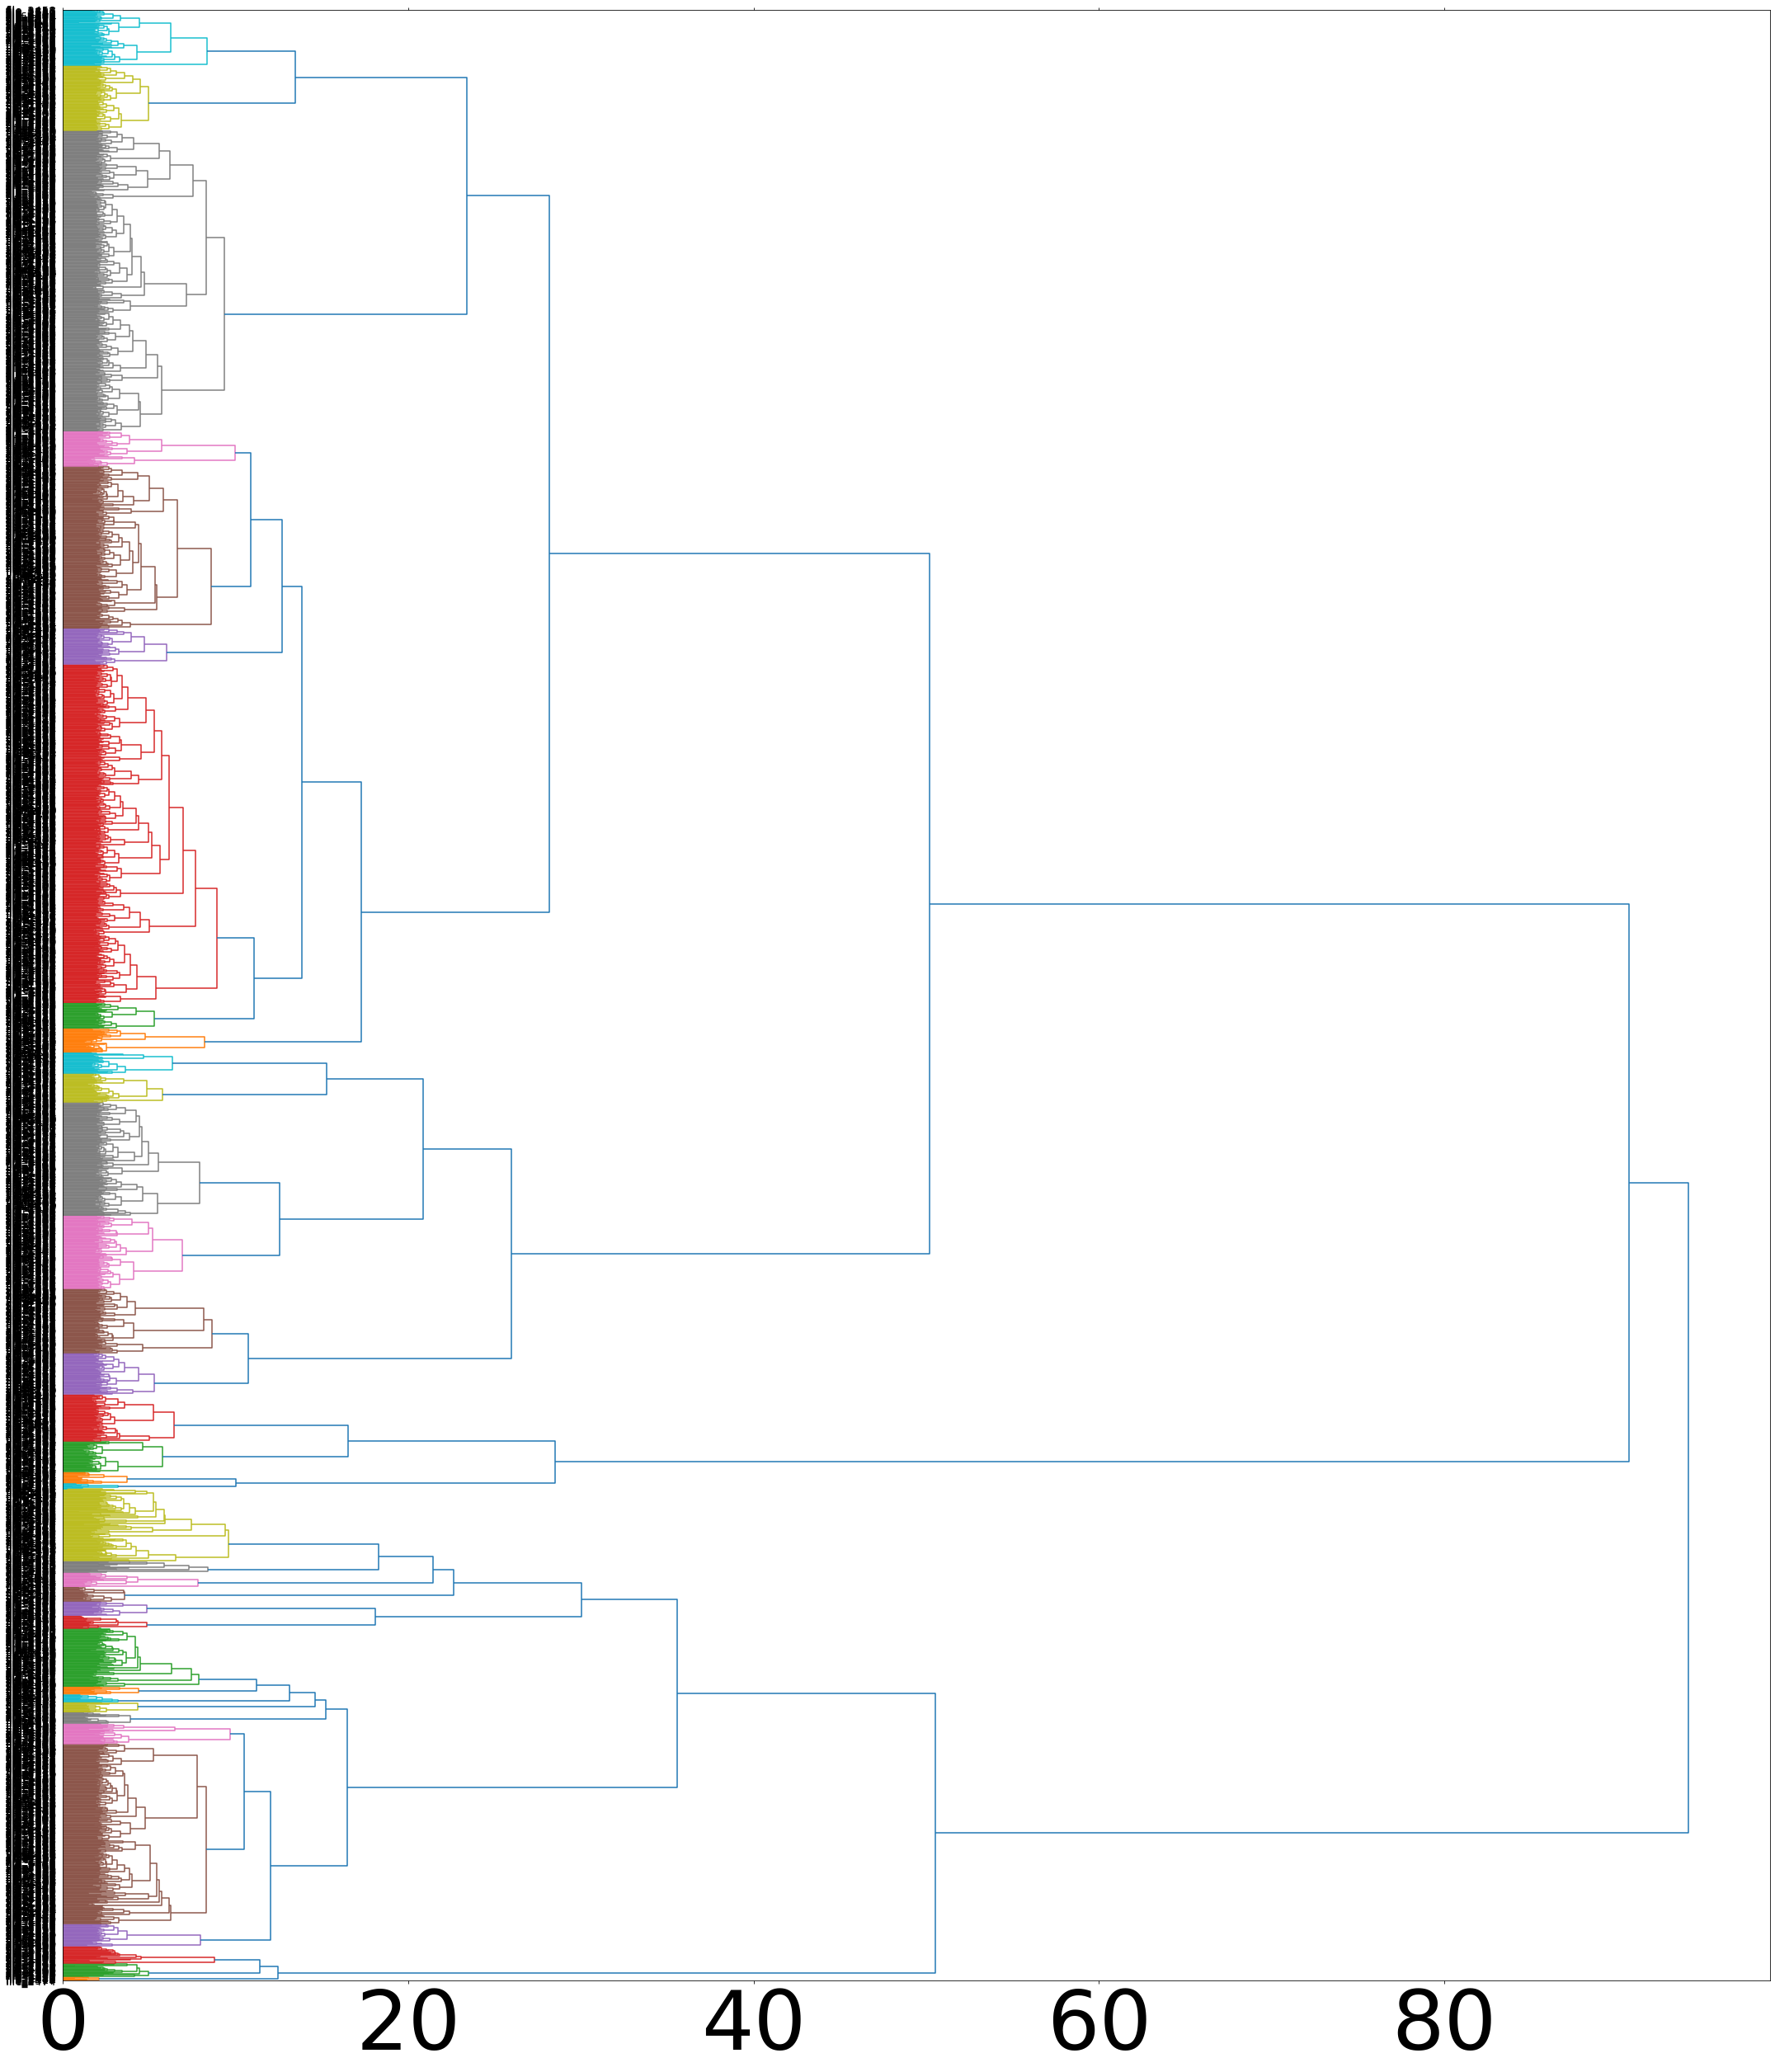

In [32]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(30, 35)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles, color_threshold=10, leaf_font_size = 13.5);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize = 100,
)

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters_QA.png', dpi=200) #save figure as ward_clusters

In [33]:
plt.close()

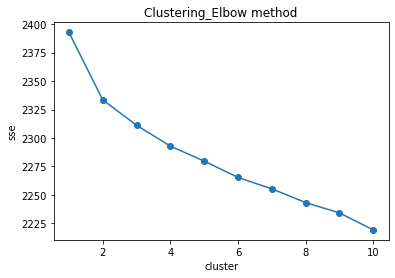

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,11), sse, marker='o')
plt.title("Clustering_Elbow method")
plt.xlabel("cluster")
plt.ylabel("sse")
plt.show()

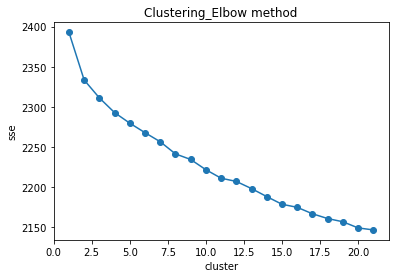

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1,22):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,22), sse, marker='o')
plt.title("Clustering_Elbow method")
plt.xlabel("cluster")
plt.ylabel("sse")
plt.show()

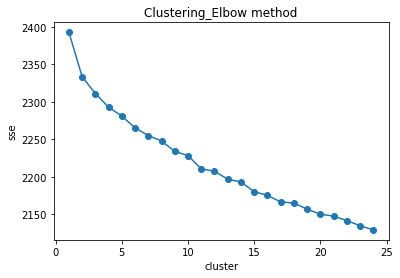

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1,25):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,25), sse, marker='o')
plt.title("Clustering_Elbow method")
plt.xlabel("cluster")
plt.ylabel("sse")
plt.show()